**Proyecto en grupo (2 miembros) - opción A:** El proyecto en grupo consiste en entrenar y evaluar varios modelos de clasificación supervisada capaz de clasificar una noticia según la taxonomía siguiente: 

- 1- Mundo, 2- Economía, 3- Política y Conflictos, 4- Ciencias y Tecnología, 5- Catástrofes y Accidentes, 6- Cultura y Artes, 7- Deporte, 8- Ecología y Planeta, 9- Crimen, delitos y Justicia, 10- Salud

Hito Unidad 1 (29 de septiembre): Datasets de entrenamiento y test + primer modelo baseline

Hito Unidad 2 (27 de octubre): Implementación y experimentos de varios modelos de clasificación

In [1]:
import pandas as pd
from os import listdir
from os.path import join
from tqdm import tqdm
from my_funcs import *
import re

unique_tags = set()
folder = './noticias'
dfs = []
for archivo in tqdm(listdir(folder)):
    corpus = pd.read_csv(join(folder, archivo))
    corpus = clean_df(corpus)
    dfs.append(corpus)
    #print(corpus.head())
    #print(archivo, corpus.tag.unique())
    for tag in corpus.tag.unique():
        unique_tags.add(tag)

100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.85it/s]


In [2]:
dm = pd.read_csv('./categorias - hojav2.csv')
dm.rename(columns={'Unnamed: 0':'tag'}, inplace=True)
vals = dm.iloc[:, 1:]
labels = vals[vals.max(axis=1)>0].idxmax(axis=1)

In [3]:
cats = pd.DataFrame(labels)
cats = cats.join(dm['tag'])
cats.rename(columns={0:'cat'}, inplace=True)
cats_dict = dict(zip(cats['tag'], cats['cat']))
cats_dict

{'animal': '8-Ecología_y_Planeta',
 'artes': '6-Cultura_y_Artes',
 'Autos': '4-Ciencias_y_Tecnología',
 'braga': '3-Política_y_Conflictos',
 'ciencia-tecnologia': '4-Ciencias_y_Tecnología',
 'coronavirus': '10-Salud',
 'culto': '6-Cultura_y_Artes',
 'cultura': '6-Cultura_y_Artes',
 'Deportes': '7-Deporte',
 'deportes': '7-Deporte',
 'eclipse-2020': '8-Ecología_y_Planeta',
 'Economia': '2-Economía',
 'economia': '2-Economía',
 'el-deportivo': '7-Deporte',
 'Espectaculos': '6-Cultura_y_Artes',
 'Internacional': '1-Mundo',
 'internacional': '1-Mundo',
 'justicia': '9-Crimen_delitos_y_Justicia',
 'la-tercera-domingo': '6-Cultura_y_Artes',
 'la-tercera-tv': '2-Economía',
 'latinoamerica': '1-Mundo',
 'mapuche': '3-Política_y_Conflictos',
 'medio-ambiente': '8-Ecología_y_Planeta',
 'mercados': '2-Economía',
 'mexico': '1-Mundo',
 'mineria': '3-Política_y_Conflictos',
 'mouse': '4-Ciencias_y_Tecnología',
 'multimedia': '4-Ciencias_y_Tecnología',
 'mundo': '1-Mundo',
 'negocios': '9-Crimen_del

In [4]:
import numpy as np

final_df = pd.concat(dfs)
final_df.drop_duplicates(subset='url', keep='first', inplace=True)
final_df['category'] = final_df.apply(lambda row : cats_dict.get(row.tag, np.nan), axis=1)
#final_df['content'] = final_df['title'] + final_df['text']
final_df['content'] = final_df[['title', 'text']].agg('. '.join, axis=1)
final_df.iloc[0].content
final_df

,id,country,media_outlet,url,title,text,date,tag,category,content
0,12872,chile,horas24,https://www.24horas.cl/nacional/gobierno-da-lu...,Gobierno da luz verde a temporada de piscinas ...,"Con un acto en la piscina Tupahue, ubicada en ...",2020-12-01,nacional,NaN,Gobierno da luz verde a temporada de piscinas ...
3,12929,chile,horas24,https://www.24horas.cl/nacional/subsecretaria-...,"Subsecretaria Bown: ""La Defensoría de la Niñez...","""Entendemos que la Defensoría es un órgano aut...",2020-12-01,nacional,NaN,"Subsecretaria Bown: ""La Defensoría de la Niñez..."
4,12942,chile,horas24,https://www.24horas.cl/nacional/contralor-jorg...,Contralor Jorge Bermúdez asume como presidente...,El contralor Jorge Bermúdez asumió este 1 de d...,2020-12-01,nacional,NaN,Contralor Jorge Bermúdez asume como presidente...
5,12960,chile,horas24,https://www.24horas.cl/nacional/gobierno-propo...,Gobierno propone al ministro Mario Carroza com...,El Ministerio de Justicia dio a conocer que el...,2020-12-01,nacional,NaN,Gobierno propone al ministro Mario Carroza com...
7,12997,chile,horas24,https://www.24horas.cl/nacional/contenia-metom...,Contenía metomilo: ISP detectó peligroso pesti...,El Instituto de Salud Pública de Chile (ISP) e...,2020-12-01,nacional,NaN,Contenía metomilo: ISP detectó peligroso pesti...
...,...,...,...,...,...,...,...,...,...,...
2652,17781918,chile,emol,https://www.emol.com/noticias/Autos/2021/03/31...,Startup Lilium presenta nuevo y moderno vehícu...,Con la era de los eVTOL (vehículos eléctricos ...,2021-03-31,Autos,4-Ciencias_y_Tecnología,Startup Lilium presenta nuevo y moderno vehícu...
2653,17781934,chile,emol,https://www.emol.com/noticias/Autos/2021/03/31...,Tres icónicos autos del piloto Ken Block salen...,El famoso piloto Ken Block decidió llevar a ...,2021-03-31,Autos,4-Ciencias_y_Tecnología,Tres icónicos autos del piloto Ken Block salen...
2654,17781979,chile,emol,https://www.emol.com/noticias/Autos/2021/03/31...,Los todoterrenos de Toyota celebran siete déca...,El fabricante de autos japonés Toyota celebra ...,2021-03-31,Autos,4-Ciencias_y_Tecnología,Los todoterrenos de Toyota celebran siete déca...
2655,17781982,chile,emol,https://www.emol.com/noticias/Autos/2021/03/31...,Adrenalina tuerca y emoción de la velocidad: R...,La temporada 2021 del Copec RallyMobil inició ...,2021-03-31,Autos,4-Ciencias_y_Tecnología,Adrenalina tuerca y emoción de la velocidad: R...


In [5]:
final_df = final_df[['id','url','text', 'content', 'category']]
unravel = final_df[final_df['category'].isna()]
(unravel.sample(n=30000, random_state=2)).to_csv('full_dataset.csv')
final_df = final_df[final_df['category'].notna()]
final_df.drop(columns=['url'], inplace=True)
final_df

,id,text,content,category
14,13115,"Este martes, el Presidente Sebastián Piñera a...",Vacunación en Chile empezaría primer trimestre...,10-Salud
18,13183,La aduana china detectó la presencia del virus...,"Sernapesca: ""Viabilidad del virus de infectar ...",10-Salud
125,614680,"El presidente de México, Andrés Manuel López O...","Presidente de México asegura que la pandemia ""...",1-Mundo
126,614690,"El presidente de Uruguay, Luis Lacalle Pou, an...",Gobierno de Uruguay endurece medidas por aumen...,1-Mundo
127,614700,"El presidente boliviano, Luis Arce, destituyó ...",Presidente boliviano destituye a ministro que ...,1-Mundo
...,...,...,...,...
2652,17781918,Con la era de los eVTOL (vehículos eléctricos ...,Startup Lilium presenta nuevo y moderno vehícu...,4-Ciencias_y_Tecnología
2653,17781934,El famoso piloto Ken Block decidió llevar a ...,Tres icónicos autos del piloto Ken Block salen...,4-Ciencias_y_Tecnología
2654,17781979,El fabricante de autos japonés Toyota celebra ...,Los todoterrenos de Toyota celebran siete déca...,4-Ciencias_y_Tecnología
2655,17781982,La temporada 2021 del Copec RallyMobil inició ...,Adrenalina tuerca y emoción de la velocidad: R...,4-Ciencias_y_Tecnología


In [6]:
final_df.to_csv('cats_link.csv')

In [9]:
pd.set_option('display.max_colwidth', 80)
print(final_df['text'].loc[final_df['id'] == 5688227])

4366    La segunda tanda de la vacuna rusa Sputnik V contra el coronavirus, arribó e...
Name: text, dtype: object


In [10]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM final_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,1-Mundo,8609
1,7-Deporte,6708
2,4-Ciencias_y_Tecnología,4225
3,2-Economía,2636
4,3-Política_y_Conflictos,1923
5,10-Salud,333
6,6-Cultura_y_Artes,185
7,8-Ecología_y_Planeta,135
8,9-Crimen_delitos_y_Justicia,130


In [11]:
final_df = final_df.groupby('category').sample(n=130, random_state=2)
q="""SELECT category, count(*) FROM final_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,130
1,8-Ecología_y_Planeta,130
2,7-Deporte,130
3,6-Cultura_y_Artes,130
4,4-Ciencias_y_Tecnología,130
5,3-Política_y_Conflictos,130
6,2-Economía,130
7,10-Salud,130
8,1-Mundo,130


In [12]:
final_df.reset_index(drop=True, inplace=True)
final_df

,id,text,category
0,5708146,La vacuna contra el Covid-19 no pone fin a la devastación causada por la pan...,1-Mundo
1,6664788,Once millones de niñas en todo el mundo corren el riesgo de no volver a la e...,1-Mundo
2,14776151,"El ministro de Relaciones Exteriores de Brasil, Ernesto Araújo , presentó e...",1-Mundo
3,5742144,Se espera un enfriamiento del romance con las capitales europeas y que exist...,1-Mundo
4,14798264,"El opositor Wavel Ramkalawan se convirtió este domingo, con un 54,9% de los...",1-Mundo
...,...,...,...
1165,5801489,El Ministerio Público de Guatemala comenzó una serie de exhumaciones en vari...,9-Crimen_delitos_y_Justicia
1166,5816004,Una nueva condena por el mega fraude de Carabineros realizó el Quinto Juzgad...,9-Crimen_delitos_y_Justicia
1167,5802906,La Sexta Sala de la Corte de Apelaciones de Concepción revocó este sábado la...,9-Crimen_delitos_y_Justicia
1168,5816913,La organización no gubernamental Human Rights Watch (HRW) urgió al Gobierno ...,9-Crimen_delitos_y_Justicia


In [13]:
train_size = 0.70
train_idxs = final_df.groupby('category').sample(frac=train_size, random_state=2).index
train_df = final_df.iloc[train_idxs]

In [14]:
test_idxs = pd.concat([final_df, train_df]).drop_duplicates(keep=False).index
test_df = final_df.iloc[test_idxs]
q="""SELECT category, count(*) FROM test_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,39
1,8-Ecología_y_Planeta,39
2,7-Deporte,39
3,6-Cultura_y_Artes,39
4,4-Ciencias_y_Tecnología,39
5,3-Política_y_Conflictos,39
6,2-Economía,39
7,10-Salud,39
8,1-Mundo,39


In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
ylabels = final_df['category']

lb.fit(ylabels.unique())
true_labels = [lb.inverse_transform([i])[0] for i in range(ylabels.nunique())]
ylabels_train_target = lb.fit_transform(ylabels[train_idxs])
ylabels_test_target = lb.fit_transform(ylabels[test_idxs])

for label in true_labels:
    print(f" {label:<29} :  {lb.transform([label])[0]}")

 1-Mundo                       :  0
 10-Salud                      :  1
 2-Economía                    :  2
 3-Política_y_Conflictos       :  3
 4-Ciencias_y_Tecnología       :  4
 6-Cultura_y_Artes             :  5
 7-Deporte                     :  6
 8-Ecología_y_Planeta          :  7
 9-Crimen_delitos_y_Justicia   :  8


In [16]:
# Word tokenization
from spacy.lang.es import Spanish

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = Spanish()

text = final_df.sample(n=1)['text'].values[0][:100]
#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

[' ', 'El', 'ministro', 'de', 'Salud', ',', 'Enrique', 'Paris', ',', 'se', 'refirió', 'al', 'informe', 'emitido', 'por', 'tres', 'universidades', 'nacionale']


In [17]:
#Stop words
#importing stop words from English language.
from spacy.lang.es.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [ , ministro, Salud, ,, Enrique, Paris, ,, refirió, informe, emitido, universidades, nacionale]


In [18]:
# !python -m spacy download es_core_news_md

In [19]:
import string
import spacy

nlp = spacy.load('es_core_news_md', disable=['parser','ner','textcat','...'] )
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("es_core_news_md")
stop_words = STOP_WORDS

In [20]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

# Creating our tokenizer function
def spacy_tokenizer(sentence, stem=False):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens]
    
    # Removing stop words, ver lo de puntuuacion con  token.tag_
    mytokens = [ word for word in mytokens 
                          if word not in stop_words 
                          and word not in punctuations ]
    if stem:
        mytokens = [ stemmer.stem(word) for word in mytokens ]
    # return preprocessed list of tokens
    return " ".join(mytokens)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix, classification_report
from functools import partial
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [22]:
%%time
vectorizer = TfidfVectorizer(preprocessor=partial(spacy_tokenizer, stem=False))
XD = vectorizer.fit_transform(final_df['text'].values)
feature_names = vectorizer.get_feature_names()

CPU times: user 1min 51s, sys: 835 ms, total: 1min 52s
Wall time: 1min 53s


In [23]:
X_train = XD[train_idxs]
X_test = XD[test_idxs]

In [24]:
%%time
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

CPU times: user 3.51 s, sys: 1.86 s, total: 5.37 s
Wall time: 1.78 s


LogisticRegression(multi_class='ovr', random_state=42)

 ```
 1-Mundo      :  0
 10-Salud     :  1
 2-Economía   :  2
 3-Política_y_Conflictos :  3
 4-Ciencias_y_Tecnología :  4
 6-Cultura_y_Artes :  5
 7-Deporte    :  6
 8-Ecología_y_Planeta :  7
 9-Crimen_delitos_y_Justicia :  8
 ```

In [25]:
def predict_and_compare(df, vectorized_df, idxs=(0, 6)):
    predictions = lgr.predict(vectorized_df[idxs[0]:idxs[1]])
    predict_probs = lgr.predict_proba(vectorized_df[idxs[0]:idxs[1]])
    for i, (pred, probs) in enumerate(zip(predictions, predict_probs)):
        print('\n', df.iloc[i+idxs[0]].url)
        print()
        print(df.iloc[i+idxs[0]].text[:200], '...')
        print()
        print(f'predicted ---{lb.inverse_transform([pred])[0]}---', end=' ')
        print(f'prob: {probs[pred]:.3f}')
        print('*'*60)

In [26]:
# probar con los que no tienen etiquta real
unravel = unravel.sample(n=100)
unravel.reset_index(inplace=True)
owo = vectorizer.transform(unravel['text'].values)

In [27]:
predict_and_compare(unravel, owo, idxs=(0, 5))


 https://www.emol.com/noticias/Nacional/2021/03/29/1016373/Mas-65-millones-vacunados-covid19.html

Durante la tarde de este lunes, el  Ministerio de Salud  entregó un nuevo balance sobre el proceso de vacunación masiva contra el covid-19 que se lleva a cabo en las 16 regiones del país, revelando qu ...

predicted ---10-Salud--- prob: 0.315
************************************************************

 https://www.meganoticias.cl/tendencias/317415-netflix-assassins-creed-saga-videojuegos-ubisoft-live-action-mlx20.html

Los fanáticos de los videojuegos están felices, luego de este martes 27 de noviembre se conociera que Netflix está desarrollando una serie live-action de "Assassin's Creed", la popular saga creada por ...

predicted ---4-Ciencias_y_Tecnología--- prob: 0.372
************************************************************

 https://www.meganoticias.cl/tendencias/314194-verdades-ocultas-regreso-teleserie-mega-capitulos-adelanto-pox09.html

A más de cuatro meses de su receso, l

In [28]:
def results(ylb, text_clf, X_test):
    predicted = text_clf.predict(X_test)
    clf_name = type(text_clf).__name__
    print(f"Resultados clasificación\n{clf_name}\n\n")
    print(classification_report(ylb, predicted, target_names=true_labels))
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    plot_confusion_matrix(text_clf, X_test, ylb,
                          display_labels=true_labels,
                          ax=ax,
                          cmap='Blues')
    ax.set_title(f"Matriz de Confusión\n{clf_name}")
    plt.xticks(rotation=60)
    plt.show()

Resultados clasificación
LogisticRegression


                             precision    recall  f1-score   support

                    1-Mundo       0.89      0.87      0.88        39
                   10-Salud       0.76      0.82      0.79        39
                 2-Economía       0.86      0.79      0.83        39
    3-Política_y_Conflictos       0.89      0.82      0.85        39
    4-Ciencias_y_Tecnología       0.85      0.85      0.85        39
          6-Cultura_y_Artes       0.95      0.90      0.92        39
                  7-Deporte       1.00      0.97      0.99        39
       8-Ecología_y_Planeta       0.86      0.92      0.89        39
9-Crimen_delitos_y_Justicia       0.86      0.95      0.90        39

                   accuracy                           0.88       351
                  macro avg       0.88      0.88      0.88       351
               weighted avg       0.88      0.88      0.88       351



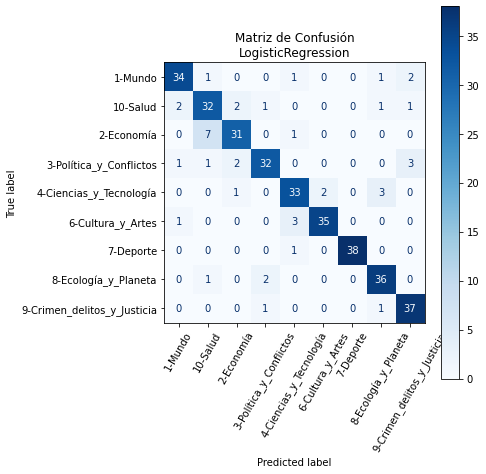

In [29]:
results(ylabels_test_target, lgr, X_test)

In [30]:
text = final_df.sample(n=1)['text'].values[0][:100]
print(text)
spacy_tokenizer(text)

El ministro de Economía,  Lucas Palacios , aseguró esta mañana que en algunas regiones del país hay 


'ministro economía lucas palacios asegurar mañana región país'

In [31]:
doc = nlp(text[:20])
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
           token.shape_, token.is_alpha, token.is_stop)

El el DET DET det Xx True True
ministro ministro NOUN NOUN ROOT xxxx True False
de de ADP ADP case xx True True
Econo Econo PROPN PROPN nmod Xxxxx True False
